In [51]:
import pandas as pd
import numpy as np
#import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
opportunities = pd.read_csv("Entrenamieto_ECI_2020.csv")

# Cantidad de apariciones de cada tipo de oportunidad

In [53]:
opportunities.drop_duplicates(subset="Opportunity_ID",inplace=True)
opTypes = opportunities[["Opportunity_Type","Opportunity_ID"]].groupby("Opportunity_Type").agg({"Opportunity_ID":"count"})
opTypes.rename(columns={"Opportunity_ID":"Cantidad"},inplace=True)
opTypes.reset_index(inplace=True)
opTypes = opTypes[opTypes["Cantidad"] > 100]
opTypes["Opportunity_Type"] = opTypes["Opportunity_Type"].apply(lambda x: x.replace("Opportunity_Type_",""))
opTypes.sort_values(by="Cantidad",inplace=True)
opTypes

,Opportunity_Type,Cantidad
13,20,135
4,12,138
18,3,183
23,8,735
11,19,1287
22,7,1998
1,1,5160


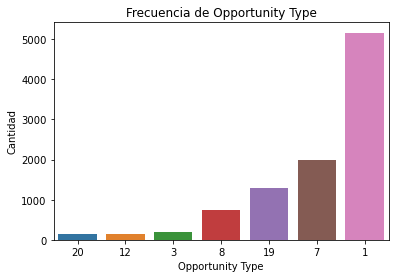

In [57]:
plot = sns.barplot(x="Opportunity_Type",y="Cantidad",data=opTypes,order=opTypes["Opportunity_Type"])
plt.xlabel("Opportunity Type")
plt.ylabel("Cantidad")
plt.title("Frecuencia de Opportunity Type")
plt.savefig("img/OpType/CantidadOpType.png")#,bbox_inches=tr.Bbox([[0, -0.3],[6,4]]))
plt.show(plot)

# OP TYPE VS STAGE

In [21]:
opTypeVsStage = opportunities.groupby(["Opportunity_Type","Stage"]).agg({"Opportunity_ID":"count"})#Consigo la cantidad de veces de cada OT por cada source
opTypeVsStage = opTypeVsStage.reset_index()
#opTypeVsStage["Opportunity_Type"] = opTypeVsStage["Opportunity_Type"].apply(lambda x: x.replace("Opportunity_Type_",""))
opTypeVsStage.rename(columns={"Opportunity_ID":"Cantidad"},inplace = True)
total = opTypeVsStage.groupby("Opportunity_Type").agg({"Cantidad":"sum"}) #La cantidad total de veces que aparece OT
opTypeVsStage.set_index("Opportunity_Type",inplace=True)
opTypeVsStage["Total"] = total["Cantidad"]
opTypeVsStage = opTypeVsStage[opTypeVsStage["Total"]>100]#Filtro a los q tienen mas de 100 entradas
opTypeVsStage.reset_index(inplace=True)
opTypeVsStage = opTypeVsStage[(opTypeVsStage["Stage"]=="Closed Won") | (opTypeVsStage["Stage"]=="Closed Lost")]
opTypeVsStage["Porcentaje"] = opTypeVsStage["Cantidad"]/opTypeVsStage["Total"]
opTypeVsStage["Opportunity_Type"] = opTypeVsStage["Opportunity_Type"].apply(lambda x: x.replace("Opportunity_Type_",""))
opTypeVsStage

,Opportunity_Type,Stage,Cantidad,Total,Porcentaje
0,1,Closed Lost,2460,5160,0.476744
1,1,Closed Won,2668,5160,0.517054
5,12,Closed Lost,16,138,0.115942
6,12,Closed Won,122,138,0.884058
7,19,Closed Lost,1075,1287,0.835276
8,19,Closed Won,202,1287,0.156954
12,20,Closed Lost,105,135,0.777778
13,20,Closed Won,30,135,0.222222
14,3,Closed Lost,100,183,0.546448
15,3,Closed Won,82,183,0.448087


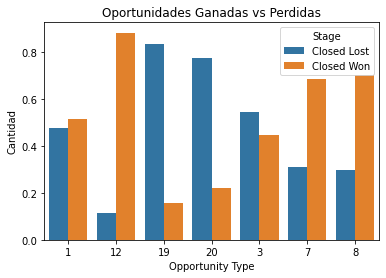

In [22]:
plot = sns.barplot(x="Opportunity_Type",y="Porcentaje",hue="Stage",data=opTypeVsStage)
#plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
plt.xlabel("Opportunity Type")
plt.ylabel("Cantidad")
plt.title("Oportunidades Ganadas vs Perdidas")
plt.savefig("img/OpType/ClosedWonVsLostPorOpType.png")#,bbox_inches=tr.Bbox([[0, -0.3],[6,4]]))
plt.show(plot)

# Op Types vs ASP

In [34]:
#ASP(converted) es siempre USD
opTypesVsASP = opportunities[["Opportunity_Type","ASP_(converted)","Opportunity_ID"]].groupby("Opportunity_Type").\
            agg({"ASP_(converted)":"mean","Opportunity_ID":"count"})
opTypesVsASP.rename(columns={"Opportunity_ID":"Cantidad"},inplace=True)
opTypesVsASP.reset_index(inplace=True)
opTypesVsASP.sort_values(by="Cantidad",inplace=True)
opTypesVsASP = opTypesVsASP[opTypesVsASP["Cantidad"] > 100]
opTypesVsASP["Opportunity_Type"] = opTypesVsASP["Opportunity_Type"].apply(lambda x: x.replace("Opportunity_Type_",""))
opTypesVsASP.sort_values(by="ASP_(converted)",inplace=True)
opTypesVsASP

,Opportunity_Type,ASP_(converted),Cantidad
4,12,0.349652,138
18,3,0.404088,183
13,20,0.418260,135
22,7,0.431177,1998
23,8,0.432679,735
1,1,0.440101,5160
11,19,0.469482,1287


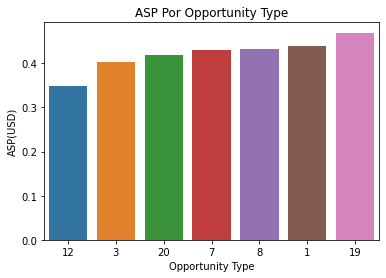

In [36]:
plot = sns.barplot(x="Opportunity_Type",y="ASP_(converted)",data=opTypesVsASP, order=opTypesVsASP["Opportunity_Type"])
plt.xlabel("Opportunity Type")
plt.ylabel("ASP(USD)")
plt.title("ASP Por Opportunity Type")
plt.savefig("img/OpType/ASPPorOpType.png")#,bbox_inches=tr.Bbox([[0, -0.3],[6,4]]))
plt.show(plot)

# Op Type vs TRF

In [44]:
opTypeVsTRF = opportunities[["Opportunity_Type","TRF","Opportunity_ID"]].groupby("Opportunity_Type").agg({"TRF":"mean","Opportunity_ID":"count"})
opTypeVsTRF = opTypeVsTRF[(opTypeVsTRF["TRF"] > 0) & (opTypeVsTRF["Opportunity_ID"]>100)]
opTypeVsTRF.reset_index(inplace=True)
opTypeVsTRF["Opportunity_Type"] = opTypeVsTRF["Opportunity_Type"].apply(lambda x: x.replace("Opportunity_Type_",""))
opTypeVsTRF = opTypeVsTRF.sort_values(by="TRF")
opTypeVsTRF

,Opportunity_Type,TRF,Opportunity_ID
6,8,0.315646,735
5,7,0.322322,1998
1,12,0.326087,138
4,3,0.732240,183
0,1,1.017829,5160
3,20,7.133333,135
2,19,16.660451,1287


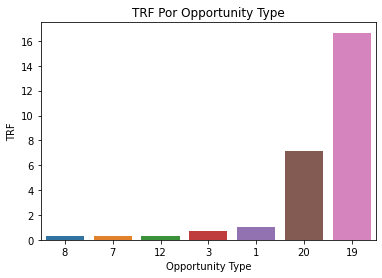

In [46]:
plot = sns.barplot(x="Opportunity_Type",y="TRF",data=opTypeVsTRF,order=opTypeVsTRF["Opportunity_Type"])
plt.xlabel("Opportunity Type")
plt.ylabel("TRF")
plt.title("TRF Por Opportunity Type")
plt.savefig("img/OpType/TRFPorOpType.png")#,bbox_inches=tr.Bbox([[0, -0.3],[6,4]]))
plt.show(plot)
#OT 19 y OT 20 son los que venden una cantidad considerable de TRF. 
#Este grafico iria mejor en el analisis de TRF, para comparar que afecta mas a la cantidad. Por ej, aca el OT 19 vende en promedio 16 toneladas, mientras que la source q mas vende
#llega solo a 4, entonces la cantidad de TRF depende mas del OT que del source